In [17]:
import pandas as pd 

#reading in CSV file and dropping rows without arrival times
df = pd.read_csv('/Users/sarah/Boston College/Research/Hackathon/BoulderPDCallData/Boulder_PD_Calls_For_Service_6765717280334821608.csv')
df = df.dropna(subset=['Time_First_Unit_Arrived'])
df = df.drop(columns=['Agency_Type', 'Master_Incident_Number', 'ID.1'])
df.sample(10)

,ID,Response_Date,Time_First_Unit_Arrived,Problem,Call_Disposition,Time_CallClosed,CallDuration,Address,x,y
194750,194751,12/15/2024 8:44:17 AM,12/15/2024 8:47:39 AM,DRUNKB-Drunk Person,TRB-Transport Made,12/15/2024 10:12:35 AM,88.0,11XX 13th St,-105.276469,40.007612
225703,225704,4/16/2025 12:49:14 AM,4/16/2025 12:49:14 AM,DIRECTB-Directed Patrol*,CB-Clear,4/16/2025 12:51:58 AM,2.0,31XX 34th St,-105.249676,40.031009
115649,115650,3/13/2024 3:38:06 PM,3/13/2024 3:40:44 PM,DISTU2B - Disturbance J/O,CB-Clear,3/13/2024 3:47:12 PM,9.0,14XX Walnut St,-105.277281,40.017643
151598,151599,7/18/2024 8:48:31 PM,7/18/2024 8:59:38 PM,REENDB-Reckless Endagerment,CB-Clear,7/18/2024 9:16:10 PM,28.0,38XX 47th St,-105.244445,40.043400
30707,30708,5/7/2023 9:42:07 PM,5/7/2023 9:57:54 PM,ANCOMB-Animal Complaint,WB-Warning given,5/7/2023 10:18:43 PM,36.0,49XX Osage Dr,-105.232343,39.990623
253750,253751,7/26/2025 4:48:05 AM,7/26/2025 4:48:05 AM,TRSTOB-Traffic Stop,WB-Warning given,7/26/2025 4:54:26 AM,6.0,Broadway / Arapahoe Ave,-105.278920,40.014323
210608,210609,2/19/2025 2:54:46 AM,2/19/2025 3:27:14 AM,ABVEHB - Abandoned Vehicle,CB-Clear,2/19/2025 3:35:07 AM,41.0,10XX College Ave,-105.279948,40.007510
137085,137086,5/30/2024 10:34:24 PM,5/30/2024 10:34:24 PM,ANCOMB-Animal Complaint,CB-Clear,5/30/2024 10:46:07 PM,12.0,6th St / Canyon Blvd,-105.287734,40.015365
165609,165610,9/3/2024 3:29:08 PM,9/3/2024 3:29:08 PM,TRSTOB-Traffic Stop,SB-Summons Written/Given,9/3/2024 3:56:37 PM,27.0,15XX Greenbriar Blvd,-105.241574,39.973050
182598,182599,10/30/2024 1:44:09 PM,10/30/2024 1:44:09 PM,ASSISB-Assist,CB-Clear,10/30/2024 9:55:42 PM,491.0,17XX 6th St,-105.287481,40.014160


In [18]:
#calculate the time difference between call time and arrival time
df['Call_Time'] = pd.to_datetime(df['Response_Date'])
df['Arrival_Time'] = pd.to_datetime(df['Time_First_Unit_Arrived'])
df['Response_Time'] = (df['Arrival_Time'] - df['Call_Time']).dt.total_seconds() / 60  # convert to minutes
df.sample(10)

,ID,Response_Date,Time_First_Unit_Arrived,Problem,Call_Disposition,Time_CallClosed,CallDuration,Address,x,y,Call_Time,Arrival_Time,Response_Time
230061,230062,5/2/2025 8:01:40 PM,5/2/2025 8:46:49 PM,BURGL3B - Burglary C,RB-Report,5/2/2025 9:35:41 PM,94.0,48XX Thunderbird Cir,-105.233462,39.989077,2025-05-02 20:01:40,2025-05-02 20:46:49,45.150000
90994,90995,12/5/2023 9:06:07 PM,12/5/2023 9:06:07 PM,TRSTOB-Traffic Stop,SB-Summons Written/Given,12/5/2023 9:16:33 PM,10.0,28th St / Baseline Rd,-105.258089,40.000546,2023-12-05 21:06:07,2023-12-05 21:06:07,0.000000
25881,25882,4/20/2023 1:00:13 AM,4/20/2023 1:00:13 AM,THEFT3B-Theft C,CB-Clear,4/20/2023 1:07:06 AM,7.0,44XX Broadway,-105.282375,40.056136,2023-04-20 01:00:13,2023-04-20 01:00:13,0.000000
33167,33168,5/17/2023 11:30:46 AM,5/17/2023 11:48:40 AM,ALINTB - Intrusion Alarm,NB-Unfounded/False Alarm,5/17/2023 11:51:42 AM,21.0,28XX Arapahoe Ave,-105.256501,40.014775,2023-05-17 11:30:46,2023-05-17 11:48:40,17.900000
177735,177736,10/13/2024 6:37:01 PM,10/13/2024 6:50:39 PM,ALINTB - Intrusion Alarm,NB-Unfounded/False Alarm,10/13/2024 6:57:15 PM,20.0,17XX Pearl St,-105.273684,40.019458,2024-10-13 18:37:01,2024-10-13 18:50:39,13.633333
35970,35971,5/28/2023 3:10:29 PM,5/28/2023 3:19:11 PM,WALKINB-Walk In Report,CB-Clear,5/28/2023 3:26:49 PM,16.0,18XX Pearl St,-105.272043,40.019794,2023-05-28 15:10:29,2023-05-28 15:19:11,8.700000
160901,160902,8/20/2024 3:11:10 PM,8/20/2024 3:11:10 PM,ATLOCB-Attempt to locate,CB-Clear,8/20/2024 3:37:21 PM,26.0,81XX Dry Creek Cir,-105.163062,40.104941,2024-08-20 15:11:10,2024-08-20 15:11:10,0.000000
158919,158920,8/13/2024 6:39:19 PM,8/13/2024 6:39:19 PM,ATLOCB-Attempt to locate,SB-Summons Written/Given,8/13/2024 7:04:04 PM,25.0,8XX Gillaspie Dr,-105.251437,39.982233,2024-08-13 18:39:19,2024-08-13 18:39:19,0.000000
232703,232704,5/12/2025 3:20:21 AM,5/12/2025 3:26:12 AM,DUIB - DUI,AB-Arrest,5/12/2025 6:58:04 AM,218.0,18XX Alpine Ave,-105.273737,40.025724,2025-05-12 03:20:21,2025-05-12 03:26:12,5.850000
226545,226546,4/19/2025 7:55:46 AM,4/19/2025 7:55:46 AM,TRSTOB-Traffic Stop,WB-Warning given,4/19/2025 8:01:19 AM,6.0,Walnut St / 18th St,-105.271996,40.018719,2025-04-19 07:55:46,2025-04-19 07:55:46,0.000000


In [19]:
#drop rows where response time is less than 1 minute (assuming outliers in data where PD is not responding to a 911 call)
df = df[df['Response_Time'] >= 1]
df.sample(10)

,ID,Response_Date,Time_First_Unit_Arrived,Problem,Call_Disposition,Time_CallClosed,CallDuration,Address,x,y,Call_Time,Arrival_Time,Response_Time
113617,113618,3/5/2024 3:47:06 PM,3/5/2024 6:01:45 PM,SUSPI3B-Suspicious C,MB-Message Left/Sent,3/5/2024 6:08:58 PM,141.0,16XX 28th St,-105.258569,40.014911,2024-03-05 15:47:06,2024-03-05 18:01:45,134.650000
195701,195702,12/18/2024 11:26:22 PM,12/18/2024 11:39:45 PM,PDACCB-Property Damage Acc,CB-Clear,12/19/2024 12:36:14 AM,70.0,16XX 30th St,-105.253859,40.015936,2024-12-18 23:26:22,2024-12-18 23:39:45,13.383333
140252,140253,6/11/2024 9:12:46 AM,6/11/2024 9:18:41 AM,ALINTB - Intrusion Alarm,CB-Clear,6/11/2024 9:21:57 AM,9.0,6XX 30th St,-105.253271,39.999478,2024-06-11 09:12:46,2024-06-11 09:18:41,5.916667
99510,99511,1/10/2024 12:05:13 AM,1/10/2024 12:19:15 AM,WARRAB-Warrant Arrest,AB-Arrest,1/10/2024 1:39:27 AM,94.0,8XX E Moorhead Cir,-105.236055,39.981194,2024-01-10 00:05:13,2024-01-10 00:19:15,14.033333
11593,11594,2/19/2023 10:10:16 AM,2/19/2023 10:47:45 AM,NOISEB-Noise Complaint,WB-Warning given,2/19/2023 10:51:08 AM,41.0,11XX University Ave,-105.278922,40.010710,2023-02-19 10:10:16,2023-02-19 10:47:45,37.483333
55437,55438,8/6/2023 5:18:58 AM,8/6/2023 5:21:43 AM,TRESP1B-Trespassing I/P,CB-Clear,8/6/2023 5:24:03 AM,6.0,29XX Baseline Rd,-105.255538,40.000215,2023-08-06 05:18:58,2023-08-06 05:21:43,2.750000
218570,218571,3/20/2025 6:49:05 AM,3/20/2025 6:55:59 AM,BEHAVEB-Behavioral Check,CB-Clear,3/20/2025 7:42:42 AM,53.0,7XX Lincoln Pl,-105.281352,40.001154,2025-03-20 06:49:05,2025-03-20 06:55:59,6.900000
131684,131685,5/11/2024 4:14:39 AM,5/11/2024 4:21:42 AM,ASSISB-Assist,SB-Summons Written/Given,5/11/2024 4:56:50 AM,42.0,11XX Walnut St,-105.281085,40.016843,2024-05-11 04:14:39,2024-05-11 04:21:42,7.050000
26526,26527,4/22/2023 12:39:42 PM,4/22/2023 1:28:49 PM,ASSISB-Assist,CB-Clear,4/22/2023 1:54:21 PM,75.0,47XX Arapahoe Ave,-105.235733,40.015028,2023-04-22 12:39:42,2023-04-22 13:28:49,49.116667
171325,171326,9/21/2024 3:31:10 AM,9/21/2024 7:15:39 AM,ASSISB-Assist,TRB-Transport Made,9/21/2024 7:41:52 AM,250.0,47XX Arapahoe Ave,-105.235733,40.015028,2024-09-21 03:31:10,2024-09-21 07:15:39,224.483333


In [21]:
#sort dataframe by response time
df_sorted = df.sort_values(by='Response_Time', ascending=False)
df_sorted.head(15)

,ID,Response_Date,Time_First_Unit_Arrived,Problem,Call_Disposition,Time_CallClosed,CallDuration,Address,x,y,Call_Time,Arrival_Time,Response_Time
239136,239137,6/5/2025 2:48:03 AM,6/7/2025 12:28:29 AM,EXPATB-Extra Patrol*,CB-Clear,6/7/2025 1:11:12 AM,2783.0,3XX Oneida St,-105.226748,39.994715,2025-06-05 02:48:03,2025-06-07 00:28:29,2740.433333
54254,54255,8/2/2023 9:37:14 AM,8/3/2023 3:35:09 PM,EXPATB-Extra Patrol*,CB-Clear,8/3/2023 5:56:10 PM,1939.0,29XX Shady Hollow W,-105.260956,40.029063,2023-08-02 09:37:14,2023-08-03 15:35:09,1797.916667
44796,44797,6/29/2023 4:26:14 PM,6/30/2023 3:01:58 PM,EXPATB-Extra Patrol*,CB-Clear,6/30/2023 3:46:37 PM,1400.0,54XX Pennsylvania Ave,-105.226091,40.006727,2023-06-29 16:26:14,2023-06-30 15:01:58,1355.733333
123378,123379,4/11/2024 8:57:45 AM,4/12/2024 7:07:39 AM,EXPATB-Extra Patrol*,XB-Call Canceled,4/15/2024 10:07:14 PM,6550.0,12XX Pearl St,-105.279704,40.018240,2024-04-11 08:57:45,2024-04-12 07:07:39,1329.900000
238070,238071,6/1/2025 4:29:30 AM,6/1/2025 6:54:54 PM,INFORB-Information,CB-Clear,6/1/2025 7:41:50 PM,912.0,13th St / Pearl St,-105.278944,40.018391,2025-06-01 04:29:30,2025-06-01 18:54:54,865.400000
106860,106861,2/8/2024 10:03:26 AM,2/8/2024 10:52:43 PM,REPROB-Recovered Stolen Prop,AB-Arrest,2/9/2024 3:55:54 AM,1072.0,47XX Pearl East Cir,-105.242500,40.022728,2024-02-08 10:03:26,2024-02-08 22:52:43,769.283333
165980,165981,9/4/2024 4:11:15 PM,9/5/2024 4:37:22 AM,EXPATB-Extra Patrol*,CB-Clear,9/5/2024 4:41:02 AM,750.0,19XX 28th St,-105.258581,40.021825,2024-09-04 16:11:15,2024-09-05 04:37:22,746.116667
208042,208043,2/9/2025 2:02:09 AM,2/9/2025 1:53:15 PM,EXPATB-Extra Patrol*,CB-Clear,2/10/2025 5:50:34 PM,2388.0,11XX 35th St,-105.248623,40.006581,2025-02-09 02:02:09,2025-02-09 13:53:15,711.100000
234690,234691,5/19/2025 6:28:51 PM,5/20/2025 6:00:43 AM,INFORB-Information,CB-Clear,5/21/2025 9:53:41 PM,3085.0,11th St / Canyon Blvd,-105.280852,40.015867,2025-05-19 18:28:51,2025-05-20 06:00:43,691.866667
185886,185887,11/11/2024 4:35:52 AM,11/11/2024 3:40:07 PM,EXPATB-Extra Patrol*,CB-Clear,11/11/2024 3:47:39 PM,672.0,31XX Galileo Ln,-105.240391,40.031216,2024-11-11 04:35:52,2024-11-11 15:40:07,664.250000


In [22]:
#excluding non-emergency problems from the analysis
problems_to_exclude = [
    'INFORB-Information',
    'FOLLOB-Follow-Up*',
    'EXPATB-Extra Patrol*',
    'REPROB-Recovered Stolen Prop',
    'FOPROB-Found Property'
]

df_filtered = df_sorted[~df_sorted['Problem'].isin(problems_to_exclude)]
df_filtered.head(15)


,ID,Response_Date,Time_First_Unit_Arrived,Problem,Call_Disposition,Time_CallClosed,CallDuration,Address,x,y,Call_Time,Arrival_Time,Response_Time
22518,22519,4/7/2023 10:28:19 AM,4/7/2023 7:22:58 PM,ASSISB-Assist,RB-Report,4/7/2023 7:37:03 PM,549.0,56XX Arapahoe Ave,-105.223614,40.014791,2023-04-07 10:28:19,2023-04-07 19:22:58,534.650000
56955,56956,8/11/2023 2:09:51 PM,8/11/2023 11:02:08 PM,ATLOCB-Attempt to locate,CB-Clear,8/12/2023 12:39:52 AM,630.0,16XX 30TH ST,-105.253859,40.015936,2023-08-11 14:09:51,2023-08-11 23:02:08,532.283333
44293,44294,6/27/2023 7:50:08 PM,6/28/2023 4:40:11 AM,SUSPI3B-Suspicious C,CB-Clear,6/28/2023 4:52:16 AM,542.0,45XX 19th St,-105.272986,40.054863,2023-06-27 19:50:08,2023-06-28 04:40:11,530.050000
168984,168985,9/13/2024 12:59:19 PM,9/13/2024 9:47:55 PM,PARKIB-Parking Complaint/Issue,CB-Clear,9/13/2024 9:53:10 PM,534.0,9XX 16th St,-105.272784,40.004918,2024-09-13 12:59:19,2024-09-13 21:47:55,528.600000
171777,171778,9/22/2024 7:04:38 PM,9/23/2024 3:47:17 AM,WECHEB-Welfare Check,CB-Clear,9/23/2024 3:55:18 AM,531.0,49XX OSAGE DR,-105.232343,39.990623,2024-09-22 19:04:38,2024-09-23 03:47:17,522.650000
44310,44311,6/27/2023 8:34:38 PM,6/28/2023 5:00:23 AM,BEHAVEB-Behavioral Check,CB-Clear,6/28/2023 5:29:06 AM,535.0,30XX Kings Ridge Blvd,-105.239794,40.029903,2023-06-27 20:34:38,2023-06-28 05:00:23,505.750000
49634,49635,7/16/2023 12:46:13 PM,7/16/2023 9:04:25 PM,ABVEHB - Abandoned Vehicle,CB-Clear,7/16/2023 9:20:44 PM,514.0,45XX 13th St,-105.281245,40.056869,2023-07-16 12:46:13,2023-07-16 21:04:25,498.200000
69291,69292,9/19/2023 6:15:42 PM,9/20/2023 2:29:06 AM,INEXP2B-Indecent Exposure J/O,UB-UTL/GOA,9/20/2023 2:31:56 AM,496.0,17th St / Athens St,-105.272793,40.012832,2023-09-19 18:15:42,2023-09-20 02:29:06,493.400000
76430,76431,10/13/2023 8:04:32 PM,10/14/2023 3:33:55 AM,LOITEB-Loitering,UB-UTL/GOA,10/14/2023 3:38:31 AM,454.0,50XX Butte St,-105.237748,40.031255,2023-10-13 20:04:32,2023-10-14 03:33:55,449.383333
164850,164851,8/31/2024 11:01:40 PM,9/1/2024 6:30:23 AM,DISTU3B - Disturbance C,CB-Clear,9/1/2024 6:36:41 AM,455.0,48XX Riverbend Rd,-105.235043,40.016260,2024-08-31 23:01:40,2024-09-01 06:30:23,448.716667


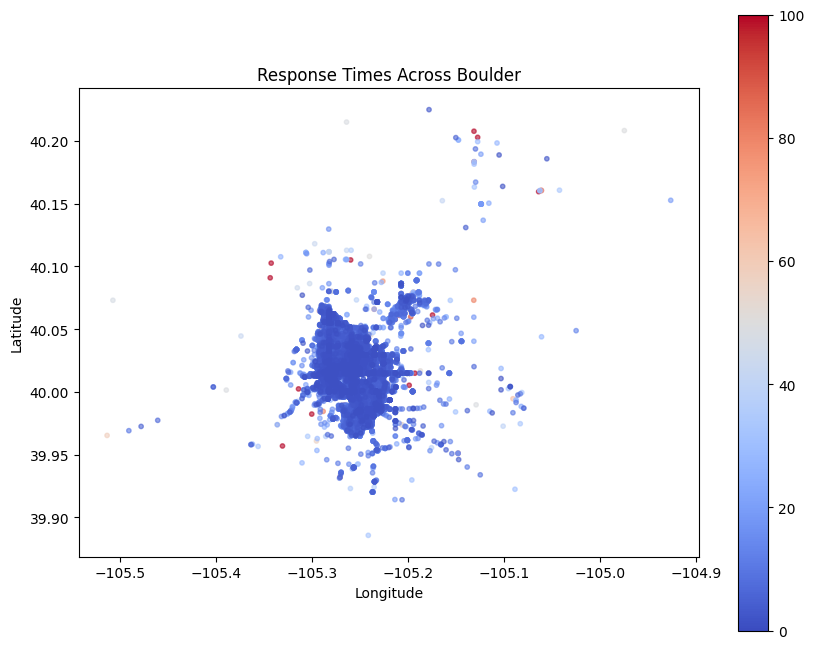

In [24]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df_filtered['x'], df_filtered['y'])]
gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)  # WGS84

#making the scale smaller
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Response_Time', 
         cmap='coolwarm', 
         legend=True, 
         ax=ax,
         markersize=10,
         alpha=0.6,
         vmin=0,       # minimum value of the color scale
         vmax=100)      # maximum value of the color scale

plt.title("Response Times Across Boulder")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

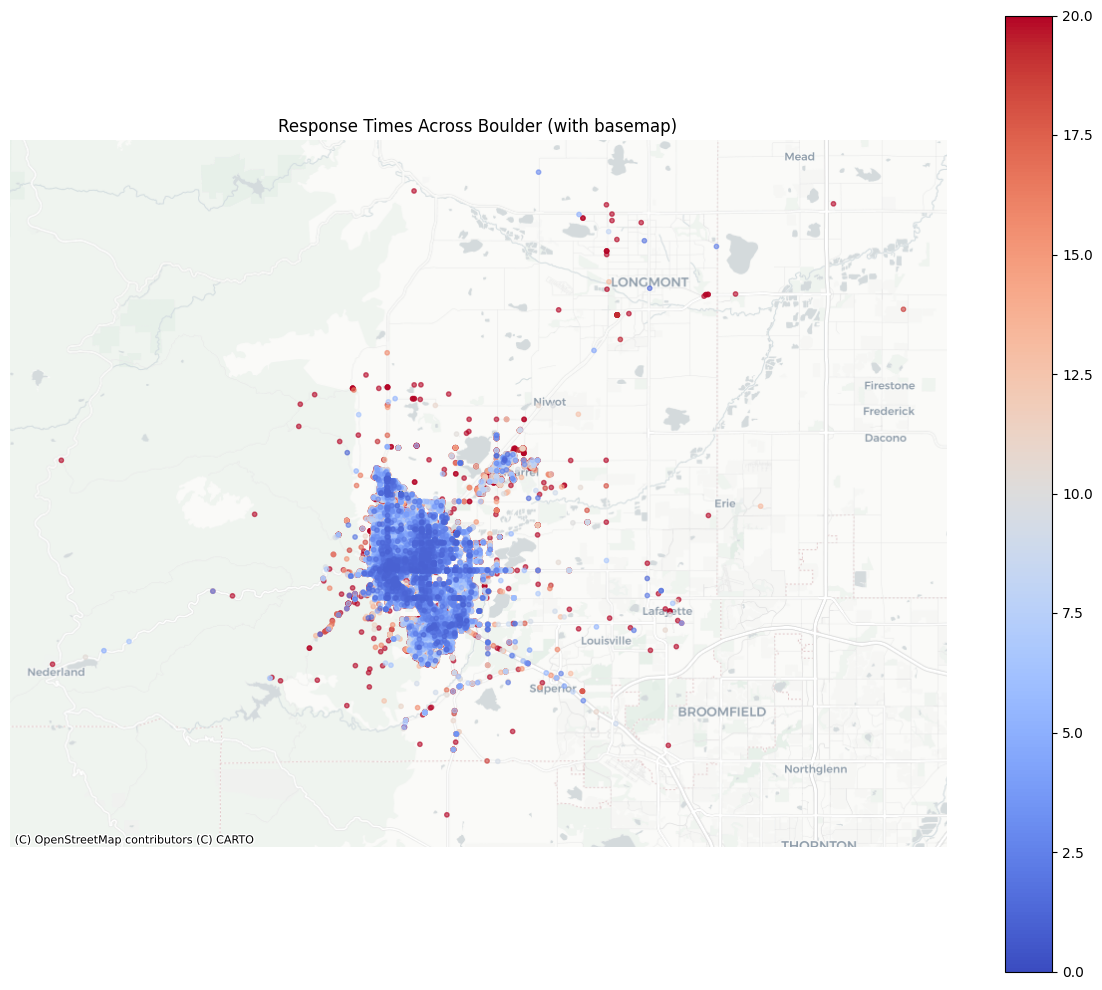

In [29]:
import contextily as cx

# Convert to Web Mercator if it's not already
gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 10))

gdf_web.plot(column='Response_Time',
             cmap='coolwarm',
             legend=True,
             ax=ax,
             markersize=10,
             alpha=0.6,
             vmin=0,
             vmax=20)

# CartoDB Positron - clean, light-colored map with minimal details
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Optional: clean up axis
ax.set_axis_off()
plt.title("Response Times Across Boulder (with basemap)")
plt.tight_layout()
plt.show()


In [30]:
#sorting data points into census blocks using shapefiles
blocks = gpd.read_file("/Users/sarah/Boston College/Research/Hackathon/BoulderPDCallData/bg20_2")

from shapely.geometry import Point

# Create geometry column from lat/lon
geometry = [Point(xy) for xy in zip(df['x'], df['y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set CRS to WGS84 (EPSG:4326) for lat/lon
gdf.set_crs(epsg=4326, inplace=True)


,ID,Response_Date,Time_First_Unit_Arrived,Problem,Call_Disposition,Time_CallClosed,CallDuration,Address,x,y,Call_Time,Arrival_Time,Response_Time,geometry
1,2,1/1/2023 7:08:43 AM,1/1/2023 7:12:13 AM,DOMES1B-Domestic Disturb I/P,AB-Arrest,1/1/2023 11:29:28 AM,261.0,22XX Junction Pl,-105.252063,40.025020,2023-01-01 07:08:43,2023-01-01 07:12:13,3.500000,POINT (-105.25206 40.02502)
2,3,1/1/2023 7:09:44 AM,1/1/2023 7:17:07 AM,FIREWB-Fire Works Complaints,UB-UTL/GOA,1/1/2023 7:26:31 AM,17.0,25XX Table Mesa Dr,-105.262953,39.981419,2023-01-01 07:09:44,2023-01-01 07:17:07,7.383333,POINT (-105.26295 39.98142)
4,5,1/1/2023 7:17:04 AM,1/1/2023 7:35:12 AM,ASSAU2B - Assault J/O,CB-Clear,1/1/2023 7:46:15 AM,29.0,10XX Pearl St,-105.282803,40.017584,2023-01-01 07:17:04,2023-01-01 07:35:12,18.133333,POINT (-105.2828 40.01758)
6,7,1/1/2023 7:25:11 AM,1/1/2023 8:12:50 AM,ASSISB-Assist,CB-Clear,1/1/2023 8:19:51 AM,54.0,24XX Spruce St,-105.264658,40.022394,2023-01-01 07:25:11,2023-01-01 08:12:50,47.650000,POINT (-105.26466 40.02239)
9,10,1/1/2023 7:43:24 AM,1/1/2023 7:48:15 AM,TRAFFB-Traffic Complaint,CB-Clear,1/1/2023 8:15:27 AM,32.0,6th St / Canyon Blvd,-105.287734,40.015365,2023-01-01 07:43:24,2023-01-01 07:48:15,4.850000,POINT (-105.28773 40.01537)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254886,254887,7/30/2025 7:57:52 AM,7/30/2025 8:10:44 AM,TRESP2B-Trespassing J/O,CB-Clear,7/30/2025 8:48:10 AM,51.0,32XX 28th St,-105.258695,40.034959,2025-07-30 07:57:52,2025-07-30 08:10:44,12.866667,POINT (-105.25869 40.03496)
254887,254888,7/30/2025 7:58:58 AM,7/30/2025 8:34:49 AM,HARAS2B-Harassment J/O,UB-UTL/GOA,7/30/2025 8:40:22 AM,42.0,13XX College Ave,-105.275538,40.007512,2025-07-30 07:58:58,2025-07-30 08:34:49,35.850000,POINT (-105.27554 40.00751)
254888,254889,7/30/2025 8:24:32 AM,7/30/2025 8:30:36 AM,TRESP2B-Trespassing J/O,UB-UTL/GOA,7/30/2025 8:34:08 AM,10.0,54XX Pennsylvania Ave,-105.226091,40.006727,2025-07-30 08:24:32,2025-07-30 08:30:36,6.066667,POINT (-105.22609 40.00673)
254889,254890,7/30/2025 8:28:53 AM,7/30/2025 8:32:21 AM,ALINTB - Intrusion Alarm,NB-Unfounded/False Alarm,7/30/2025 8:41:33 AM,13.0,47XX Table Mesa Dr,-105.238219,39.985976,2025-07-30 08:28:53,2025-07-30 08:32:21,3.466667,POINT (-105.23822 39.98598)
